In [7]:
import matplotlib.pyplot as plt
from sympy import Ellipse, Point, S,pi,plot_implicit,Eq,tan
import sympy as sp
import numpy as np
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
from IPython.display import display, Latex 
from sympy import Expr, S, pi, plot_implicit, Eq, tan, latex, sympify
from sympy.core.evaluate import global_evaluate
from sympy.core.logic import fuzzy_bool
from sympy.core.numbers import Rational, oo
from sympy.core.compatibility import ordered
from sympy.core.symbol import Dummy, _uniquely_named_symbol, _symbol
from sympy.simplify import simplify, trigsimp
from sympy.functions.elementary.miscellaneous import sqrt, Max
from sympy.functions.elementary.trigonometric import cos, sin
from sympy.geometry.exceptions import GeometryError
from sympy.geometry.line import Ray2D, Segment2D, Line2D, LinearEntity3D
from sympy.solvers import solve

from sympy.geometry.entity import GeometryEntity, GeometrySet
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line, Segment
from sympy.geometry.util import idiff

In [8]:
class Hyperbola(GeometrySet):
    """
     Attributes
    ==========
    center
    hradius
    vradius
    eccentricity
    periapsis
    focus_distance
    foci
    ==========
    конструктор __new__
    скопирован из Эллипса,
    изменена формула для  hradius и vradius через эсцентриситет
    """
    def __new__(
        cls, center = None, hradius = None, vradius = None, eccentricity = None, **kwargs):
        hradius = sympify(hradius)
        vradius = sympify(vradius)
        eccentricity = sympify(eccentricity)
        if center is None:
            center = Point(0, 0)
        else:
            center = Point(center, dim=2)
        if len(center) != 2:
            raise ValueError('The center of "{0}" must be a two dimensional point'.format(cls))
        if len(list(filter(lambda x: x is not None, (hradius, vradius, eccentricity)))) != 2:
            raise ValueError(filldedent('''
                Exactly two arguments of "hradius", "vradius", and
                "eccentricity" must not be None.'''))
        if eccentricity is not None:
            if hradius is None:
                hradius = vradius / sqrt( eccentricity**2-1)
            elif vradius is None:
                vradius = hradius * sqrt( eccentricity**2-1)
        if hradius == 0:
            return "Line"
        if vradius == 0:
            return "Rays"
        return GeometryEntity.__new__(cls, center, hradius, vradius, **kwargs)
    
    
    @property
    def ambient_dimension(self):
        return 2
    
    
    @property
    def center(self):
        return self.args[0]

    
    @property
    def hradius(self):
        return self.args[1]
    
    
    @property
    def vradius(self):
        return self.args[2]
    
    
    @property
    def focus_distance(self):
        return sqrt(self.hradius**2+ self.vradius**2)
    
    
    @property
    def eccentricity(self):
        """The eccentricity of the ellipse."""
        return self.focus_distance / self.hradius
    
    
    @property
    def periapsis(self):
        """The apoapsis of the hyperbola.
        The smallest distance between the focus and the contour."""
        return self.focus_distance-self.hradius
    
    
    @property
    def foci(self):
        return (self.center + Point(0, -self.focus_distance), self.center + Point(0, self.focus_distance))
    
    
    @property
    def major(self):
        return self.hradius
    
    
    @property
    def minor(self):
        return self.vradius
    

    def equation(self, x='x', y='y', _slope=None,equation=False):
        """
        Returns the equation of a hyperbola aligned with the x and y axes;
        when slope is given, the equation returned corresponds to a hyperbola 
        with a major axis having that slope.
        Parameters
        ==========
        x : str, optional
            Label for the x-axis. Default value is 'x'.
        y : str, optional
            Label for the y-axis. Default value is 'y'.
        _slope : Expr, optional
                The slope of the major axis. Ignored when 'None'.
        Returns
        =======
        equation : sympy expression   """

        x = _symbol(x, real = True)
        y = _symbol(y, real = True)
        dx = x - self.center.x
        dy = y - self.center.y
        if _slope is not None:
            L = (dy - _slope * dx)**2
            l = (_slope * dy + dx)**2
            h = 1 + _slope**2
            a = h * self.major**2
            b = h * self.minor**2
            res = l / a - L / b 
        else:
            t1 = (dx / self.hradius)**2
            t2 = (dy / self.vradius)**2
            res = t1 - t2 
        if equation == False:
            return res - 1
        else:
            return Eq(res, 1)        

# Занятие 15
# Алгебра

### Задание 1.

Изобразить на графике гиперболу с центром в точке А(1,2), полуосями 3 и 2. Вычислить эксцентриситет, фокусное расстояние. На графике отметить и подписать: 

center

hradius

vradius

periapsis

apoapsis

focus_distance

foci

В легенду включить гиперболу с ее уравнением, асимптоты и директрисы

In [9]:
Hyp = Hyperbola(sp.Point(1, 2), hradius = 3, vradius = 2)
Hyp.eccentricity, Hyp.focus_distance

In [10]:
x, y = sp.symbols('x y')
eq = Hyp.equation()
eq

In [11]:
sp.solve((x / 3 - sp.S(1) / 3)**2 - (y / 2 - 1)**2 - 1, y, domain = sp.S.Reals)

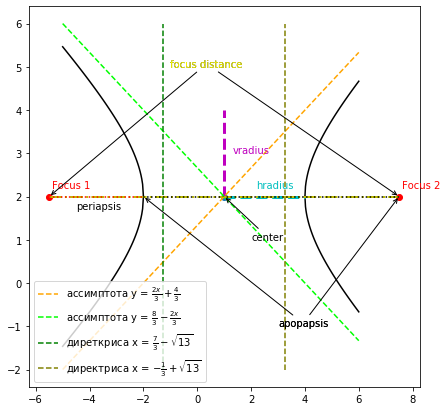

In [16]:
a = 3; 
b = 2;
c = (a**2 + b**2)**sp.S(1) / 2
plt.figure(figsize = (7, 7))
X1 = np.linspace(-5, -2, 100)
plt.plot(X1, 2 - 2 * np.sqrt((X1 - 4) * (X1 + 2)) / 3, 'k')
plt.plot(X1, 2 + 2 * np.sqrt((X1 - 4) * (X1 + 2)) / 3, 'k')
X2 = np.linspace(4, 6, 100)
plt.plot(X2, 2 - 2 * np.sqrt((X2 - 4) * (X2 + 2)) / 3, 'k')
plt.plot(X2, 2 + 2 * np.sqrt((X2 - 4) * (X2 + 2)) / 3, 'k')
plt.scatter(Hyp.center.x, Hyp.center.y)
plt.annotate("center", xy = (Hyp.center.x, Hyp.center.y), xytext = (2, 1), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))
plt.plot([Hyp.center.x, Hyp.center.x + Hyp.hradius], [Hyp.center.y, Hyp.center.y], 'c--', lw = 3)
plt.annotate("hradius", xy = (Hyp.center.x + Hyp.hradius / 2, Hyp.center.y), xytext = (Hyp.center.x + Hyp.hradius / 2 - 0.3, Hyp.center.y + 0.2), color = "c")
plt.plot([Hyp.center.x, Hyp.center.x], [Hyp.center.y, Hyp.center.y + Hyp.vradius], 'm--', lw = 3)
plt.annotate("vradius", xy = (Hyp.center.x, 3), xytext = (Hyp.center.x + 0.3, 3), color = "m")
# периапсис - наименьшее расстояние от фокуса до графика, апоапсис - наибольшее расстояние
plt.scatter(1 - c, 2, color = 'red')
plt.annotate("Focus 1", xy = (1 - c, 2), xytext = (1 - c + 0.1, 2 + 0.2), color = "red")
plt.scatter(1 + c, 2, color = 'red')
plt.annotate("Focus 2", xy = (1 + c, 2), xytext = (1 + c + 0.1, 2 + 0.2), color = "red")
plt.plot([1 - c, 1 + c], [2, 2], 'y-.', lw = 2)
plt.annotate("focus distance", xy = (1 - c, 2), xytext = (-1, 5), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))
plt.annotate("focus distance", xy = (1 + c, 2), xytext = (-1, 5), color = "yellow", arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))
plt.plot([1 - c, Hyp.center.x - a], [2, 2], 'r:')
plt.annotate("periapsis", xy = (-4, 2), xytext = (-4.5, 2 - 0.3))
plt.plot([1 + c, Hyp.center.x - a], [2, 2], 'k:')
plt.annotate("apopapsis", xy = (-2, 2), xytext = (3, -1), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))
plt.annotate("apopapsis", xy = (1 + c, 2), xytext = (3, -1), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))
# ассимптоты -[x / a +- y / b = 0 => y = +- b(x - 1) / a + 2]
X = np.linspace(-5, 6, 100)
plt.plot(X, b * (X - 1) / a + 2, color = "orange", linestyle = "--", label = "ассимптота y = " + r'$' +sp.latex(b * (x - 1) / a + 2) + r'$' )
plt.plot(X, -b * (X - 1) / a + 2, color = "lime", linestyle = "--", label = "aссимптота y = " + r'$' + sp.latex(-b * (x - 1) / a + 2) + r'$')
# директрисы x = eps * periapsis
x1 = Hyp.periapsis * Hyp.eccentricity + Hyp.center.x - Hyp.hradius
plt.plot([x1, x1], [-2, 6], 'g--', label = "диреткриса x = " + r'$' + sp.latex(sp.simplify(x1)) + r'$')
x2 = - Hyp.periapsis * Hyp.eccentricity + Hyp.center.x + Hyp.hradius
plt.plot([x2, x2], [-2, 6], color = "olive", linestyle = "--", label = "директриса x = " + r'$' + sp.latex(sp.simplify(x2))+ r'$')
plt.legend(loc = "lower left")

### Задание 2.

Повернуть гиперболу из задания 1 на 30 градусов против часовой стрелки относительно ее центра.

Вывести на экран уравнение полученной гиперболы в переменных u и v.

Подставить в уравнение вместо u число 5, решить полученое уравнение и вывести на экран полученные точки. 

In [18]:
Hyp_rotated = Hyp.equation(_slope = sp.tan(sp.pi / 6))
Hyp_rotated

In [19]:
u, v = sp.symbols('u v')
Hyp_rotated = Hyp_rotated.subs(x, u).subs(y, v)
Hyp_rotated

In [20]:
Hyp_rotated = Hyp_rotated.subs(u, 5)
Hyp_rotated

In [21]:
sp.solve(Hyp_rotated, v, domain = sp.S.Reals)

###  Индивидуальное задание

По образцу из файла с примерами построить класс Parabola

По умолчанию вершина параболы находится в начале координат, ось симметрии - OY, наклон 0.

Обязательный аргумент конструктора параболы - параметр $p$ из канонического уравнения параболы $y^2=2px$.

Необязательные аргументы конструктора - вершина параболы (точка), ось симметрии (OX или OY)

#### Реализовать атрибуты:

вершина

ось симметрии

фокус

директриса

#### Реализовать методы:

уравнение (необязательный аргумент - наклон)

draw - рисование параболы, предусмотреть необязательные параметры, по умолчанию равные False, соответствующие вершине, 
оси симметрии, фокусу и директрисе параболы. Если какой-то из этих параметров True, то на графике изображать соответствующую точку или линию. Предусмотреть необязательный аргумент annotate=False, если он  True, то подписывать все изображенные точки или линии.


In [23]:
class Parabola(GeometrySet):
    """
     Attributes
    ==========
    vertice
    symmetry_axis
    focus
    directrix
    ==========
    конструктор __new__
    """
    def __new__(
        cls, coef = None, vertice = None, symmetry_axis = None, **kwargs):
        if coef is None:
            raise ValueError(filldedent("Coefficient is a required parameter!"))
        else:
            coef = coef                 
        if vertice is None:
            vertice = sp.Point(0, 0)
        else:
            vertice = sp.Point(vertice, dim = 2)
        if len(vertice) != 2:
            raise ValueError('The center of "{0}" must be a two dimensional point'.format(cls))
        if symmetry_axis is None:
            symmetry_axis = sp.Line(sp.Point(0,0), sp.Point(0,1))
        else:
            symmetry_axis = sp.Line(symmetry_axis, dim = 2)
        return GeometryEntity.__new__(cls, coef, vertice, symmetry_axis, **kwargs)
                             
    
    @property
    def ambient_dimension(self):
        return 2
                             
    
    @property
    def coef(self):
        return self.args[0]
                             
    
    @property
    def vertice(self):
        return self.args[1]

    
    @property
    def symmetry_axis(self):
        return self.args[2]
    
    
    @property
    def focus(self):
        alp = self.symmetry_axis.angle_between(sp.Line(sp.Point(0,0), sp.Point(1,0)))        
        return sp.Point(self.vertice.x + sp.cos(alp)*self.coef/2, self.vertice.y + sp.sin(alp)*self.coef/2)
    
    
    @property
    def directrix(self):
        alp = self.symmetry_axis.angle_between(sp.Line(sp.Point(0,0), sp.Point(1,0)))
        return self.symmetry_axis.perpendicular_line(sp.Point(self.vertice.x + sp.cos(alp)*self.coef/2, self.vertice.y + sp.sin(alp)*self.coef/2))
    
    
    def equation(self, x = 'x', y = 'y', _slope = None, equation = False):
        x = _symbol(x, real = True)
        y = _symbol(y, real = True)   
        if equation == False:
            if self.symmetry_axis == sp.Line(sp.Point(0, 0), sp.Point(1, 0)):               
                if _slope is not None:
                    res = (y - float(_slope) * x)**2 - 2 * self.coef * x
                else:
                    res = y**2 - 2 * self.coef * x
            else:
                if _slope is not None:
                    res = (x - float(_slope) * y)**2 - 2 * self.coef * y
                else:
                    res = x**2 - 2 * self.coef * y
            return res
        else:
            if self.symmetry_axis == sp.Line(sp.Point(0, 0), sp.Point(1, 0)):               
                if _slope is not None:
                    return sp.Eq((y - float(_slope) * x)**2, 2 * self.coef * x)
                else:
                    return sp.Eq(y**2, 2 * self.coef * x)
            else:
                if _slope is not None:
                    return sp.Eq((x - float(_slope) * y)**2, 2 * self.coef * y)
                else:
                    return sp.Eq(x**2, 2 * self.coef * y)
        
        
    def draw(self, vertice = False, symmetry_axis = False, focus = False, directrix = False, annotate = False):
        if self.symmetry_axis == sp.Line(sp.Point(0, 0), sp.Point(1, 0)):
            Y1 = [self.vertice.y + i / 100 for i in range(400)]
            Y2 = [self.vertice.y - i / 100 for i in range(400)]
            X1 = [y**2 / (2 * self.coef) for y in Y1]
            X2 = [y**2 / (2 * self.coef) for y in Y2]
            plt.plot(X1, Y1, 'k-')
            plt.plot(X2, Y2, 'k-')
            if symmetry_axis == True:
                X = [self.vertice.x - 2 + i / 100 for i in range(1000)]
                Y = [0 for i in range(1000)]
                plt.plot(X, Y, 'c:', lw = 2)
            if directrix == True:
                Y = [self.vertice.y - 5 + i / 100 for i in range(1000)]
                X = [self.vertice.x - self.coef / 2 for i in range(1000)]
                plt.plot(X, Y, 'm--', lw = 2)
            if annotate == True:
                plt.annotate("vertice", xy = (self.vertice.x, self.vertice.y), xytext = (self.vertice.x + 0.1, self.vertice.y + 0.1))
                plt.annotate("focus", xy = (self.focus.x, self.focus.y), xytext = (self.focus.x + 0.1, self.focus.y + 0.1))
                plt.annotate("symmetry axis", xy = (self.symmetry_axis.p1.x, self.symmetry_axis.p1.y), xytext = (self.symmetry_axis.p1.x + 0.1, self.symmetry_axis.p1.y + 5))
                plt.annotate("directrix", xy = (self.directrix.p1.x, self.directrix.p1.y), xytext = (self.directrix.p1.x + 0.1, self.directrix.p1.y - 1.5))
        else:
            X1 = [self.vertice.x + i / 100 for i in range(400)]
            X2 = [self.vertice.x - i / 100 for i in range(400)]
            Y1 = [x**2 / (2 * self.coef) for x in X1]
            Y2 = [x**2 / (2 * self.coef) for x in X2]
            plt.plot(X1, Y1, 'k-')
            plt.plot(X2, Y2, 'k-')
            if symmetry_axis == True:
                Y = [self.vertice.y - 2 + i / 100 for i in range(1000)]
                X = [0 for i in range(1000)]
                plt.plot(X, Y, 'c:', lw = 2)
            if directrix == True:
                X = [self.vertice.x - 5 + i / 100 for i in range(1000)]
                Y = [self.vertice.y - self.coef / 2 for i in range(1000)]
                plt.plot(X, Y, 'm--', lw = 2)
            if annotate == True:
                plt.annotate("vertice", xy = (self.vertice.x, self.vertice.y), xytext = (self.vertice.x + 0.1, self.vertice.y + 0.1))
                plt.annotate("focus", xy = (self.focus.x, self.focus.y), xytext = (self.focus.x + 0.1, self.focus.y + 0.1))
                plt.annotate("symmetry axis", xy = (self.symmetry_axis.p1.x, self.symmetry_axis.p1.y), xytext = (self.symmetry_axis.p1.x + 0.1, self.symmetry_axis.p1.y + 5))
                plt.annotate("directrix", xy = (self.directrix.p1.x, self.directrix.p1.y), xytext = (self.directrix.p1.x + 0.1, self.directrix.p1.y - 1.5))        
        if vertice == True:
            plt.scatter(self.vertice.x, self.vertice.y)
        if focus == True:
            plt.scatter(self.focus.x, self.focus.y)

In [24]:
p = Parabola(coef = 1, symmetry_axis = sp.Line(sp.Point(0, 0), sp.Point(1, 0)))
p.equation(equation = True)

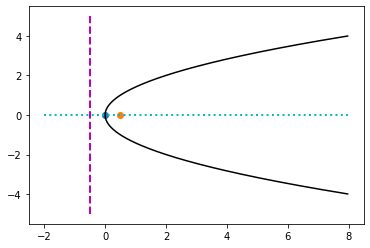

In [25]:
p.draw(vertice = True, symmetry_axis = True, focus = True, directrix = True)

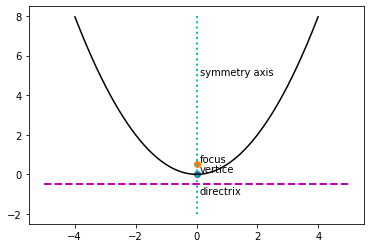

In [26]:
p1 = Parabola(coef = 1, symmetry_axis = sp.Line(sp.Point(0,0),sp.Point(0,1)))
p1.draw(vertice = True, symmetry_axis = True, focus = True, directrix = True, annotate = True)